# Life Cycle of Data Science Projects

- Data Analysis
- Feature Engineering
- Feature Selection
- Model Building
- Moel Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)
#pd.pandas.set_option("display.max_rows",None)

In [2]:
data=pd.read_csv("train.csv")
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
data.shape

(1460, 81)

# Exploaratory Data Analysis

1.Missing Values
2.All the Numerical Variables
3-Distribution of the Numerical Variables
4-Categorical Variables
5-Cardinality of categorical Variables
5-Outliers
6-Relationship Between independent and dependent feature(Sales Price)

In [4]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()]

for feature in features_with_na:
    
    print(feature,(data[feature].isnull().sum()))
    
    #print(feature,np.round(data[feature].isnull().mean(),4),"% missing values")

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


# Relationship of Missing Values with Sales Price

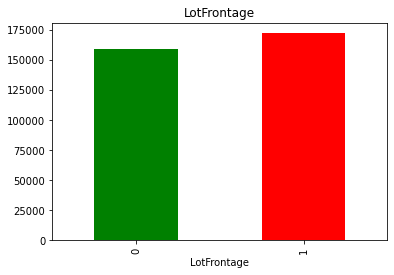

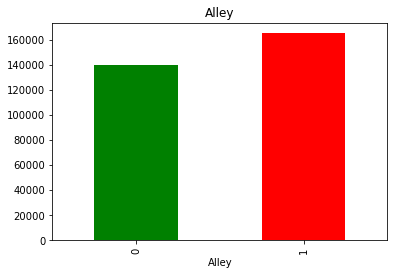

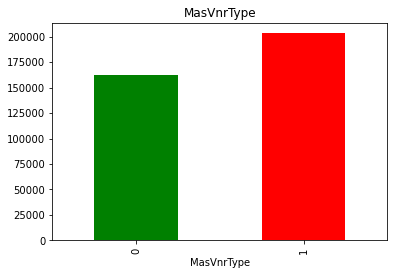

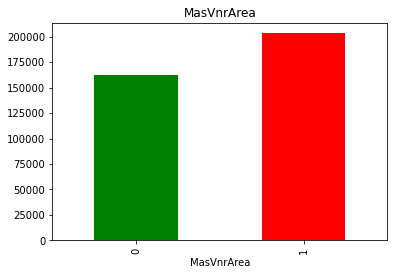

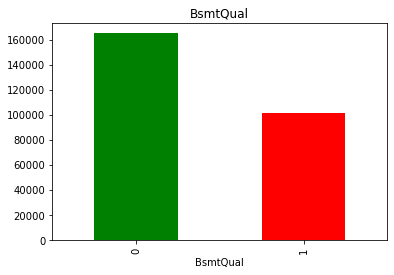

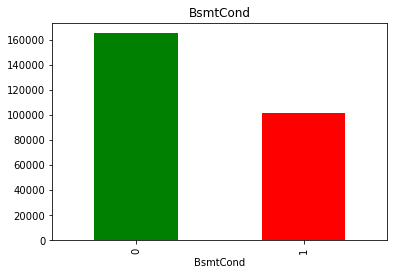

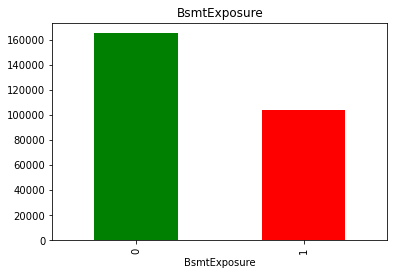

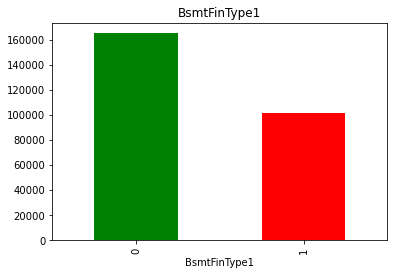

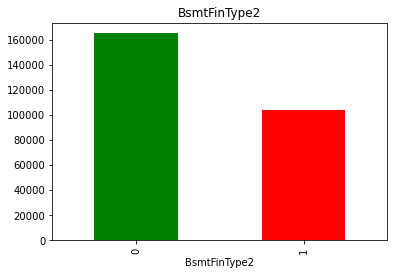

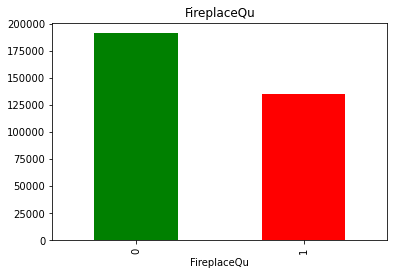

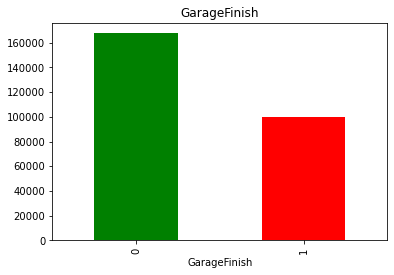

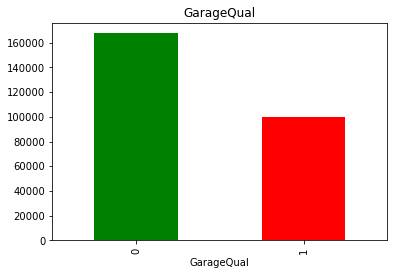

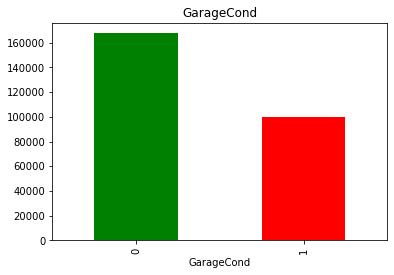

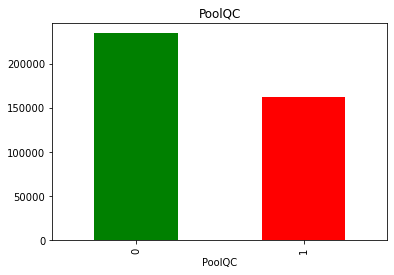

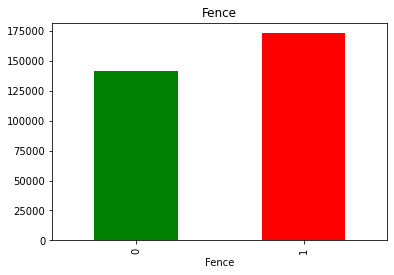

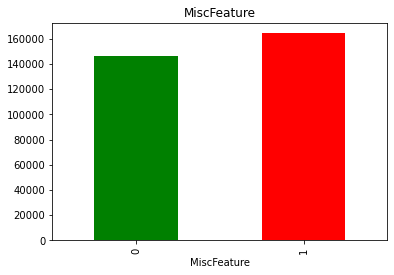

In [5]:
for feature in features_with_na:
    dataset=data.copy()
    # we replace the rows that are null with 1 and if data is present we replkce it with zero
    dataset[feature]=np.where(dataset[feature].isnull(),1,0)
    
    dataset.groupby(feature)["SalePrice"].median().plot.bar(color=["Green","Red"])
    plt.title(feature)
    plt.show()

# We can see clearly that the red bar(missing values) have high impact on the Sales Price so we cannot drop these rows or columns we have to handle it

In [6]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']

print("Number of Numeric Variables ",len(numerical_features))
data[numerical_features].head(5)

Number of Numeric Variables  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [7]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Extracting Year or Time Features from Data and will check impact of it on Price Feature

In [8]:
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
for feature in year_feature:
    print(feature,data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Year Sold Vs Sale Price')

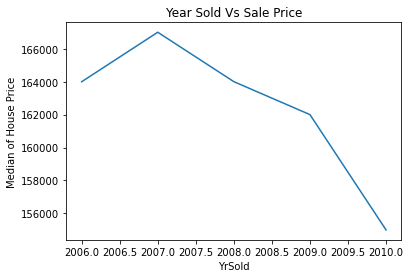

In [10]:
data.groupby("YrSold")['SalePrice'].median().plot()
plt.xlabel("YrSold")
plt.ylabel("Median of House Price")
plt.title("Year Sold Vs Sale Price")

In [11]:
data.groupby("YearBuilt")['SalePrice'].median().plot()
plt.xlabel("YearBuilt")
plt.ylabel("Median of House Price")
plt.title("Year Built Vs Sale Price")

Text(0.5, 1.0, 'Year Built Vs Sale Price')

# Feartures with Discrete Values impact on Sales Price

In [12]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]

print("Total Discrete Variables {}".format(len(discrete_feature)))

Total Discrete Variables 17


In [13]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

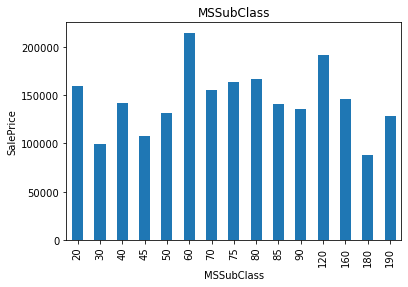

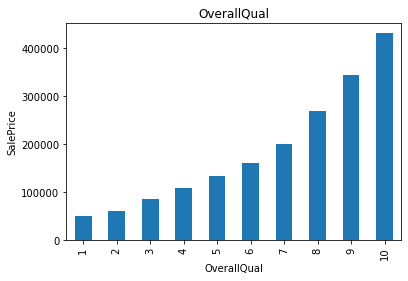

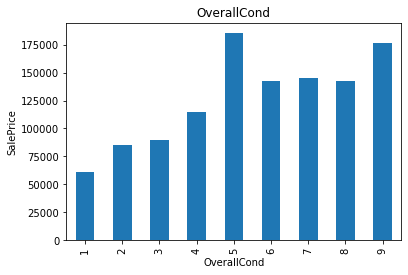

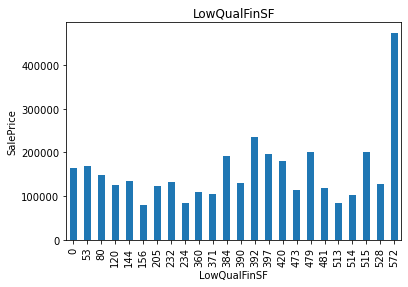

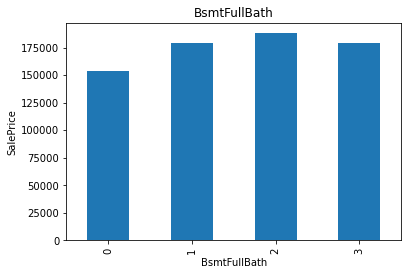

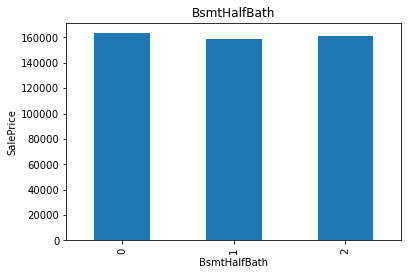

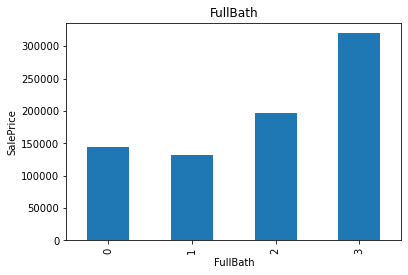

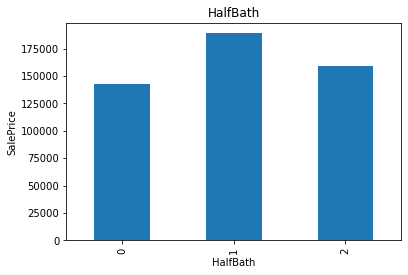

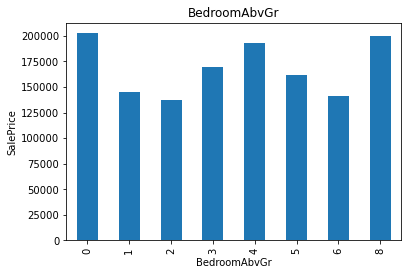

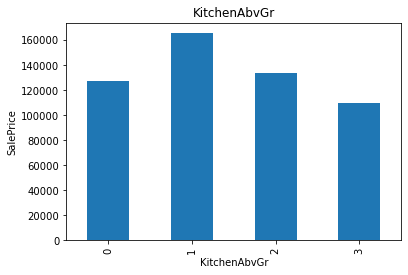

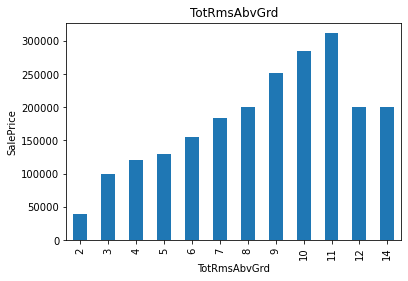

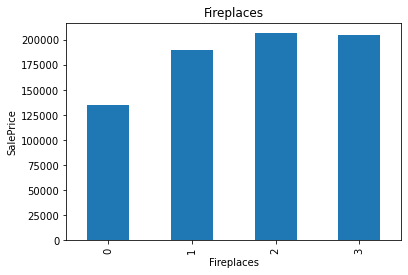

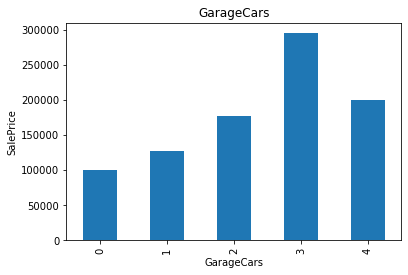

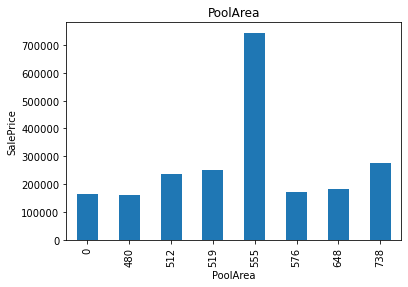

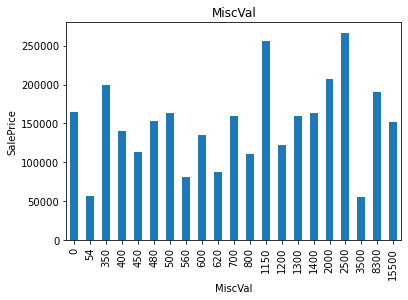

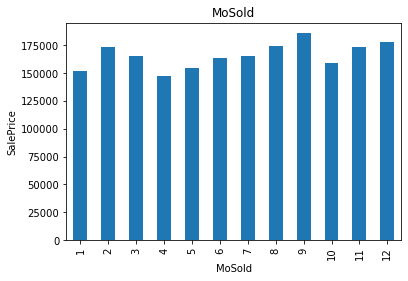

In [14]:
for feature in discrete_feature:
    dataset=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

# Distribution of Continuous Features

In [15]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Total Continuous Variables {}".format(len(continuous_feature)))

Total Continuous Variables 16


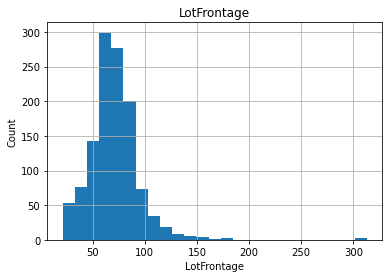

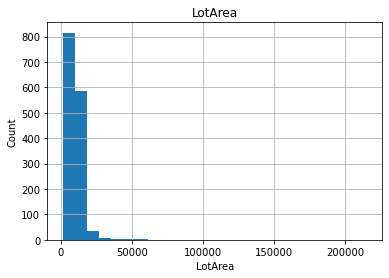

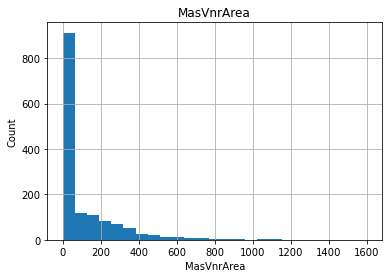

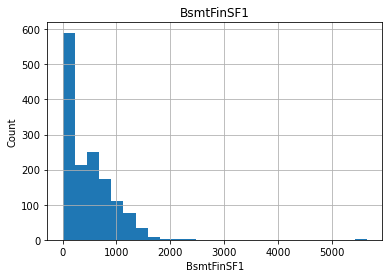

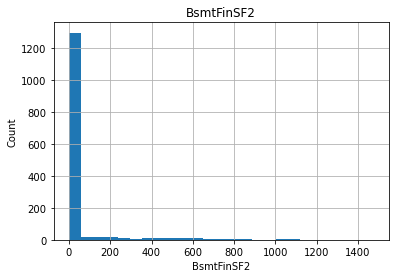

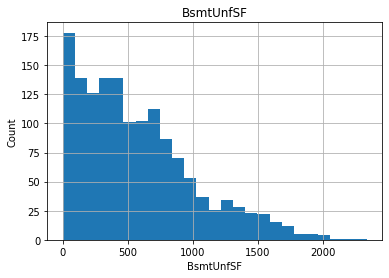

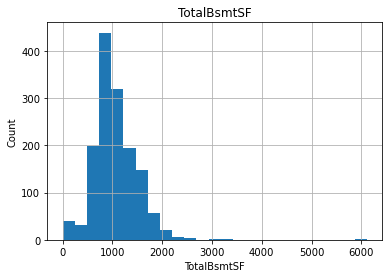

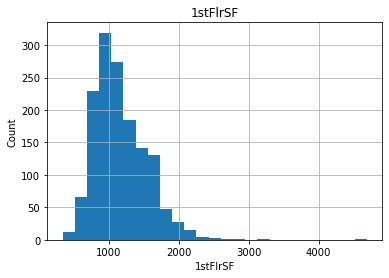

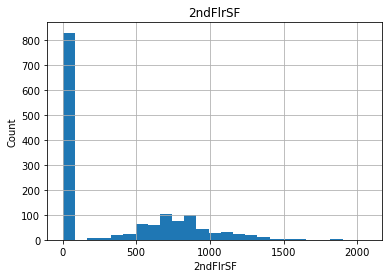

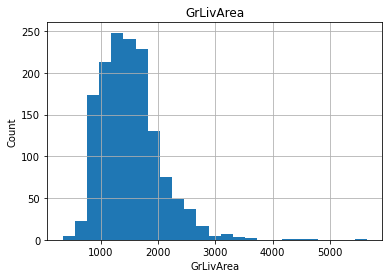

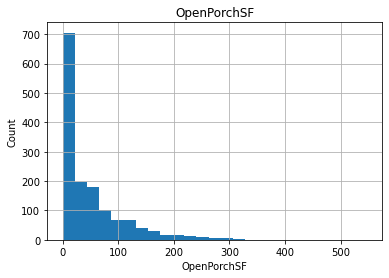

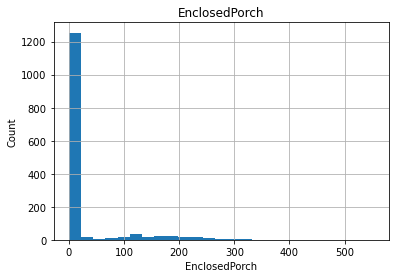

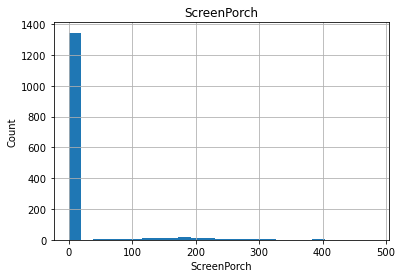

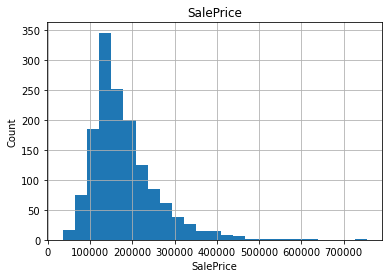

In [16]:
for feature in continuous_feature:
    dataset=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [17]:
#Hence some of the features are not Guassian means the data is skewed data so we will
# convert non guassian data into Standard Normal for better linear model Predictions

# Applying Log Normal to convert Continuous features into Normal Distribution 

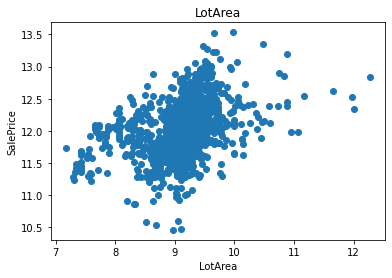

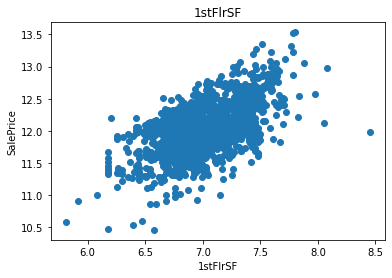

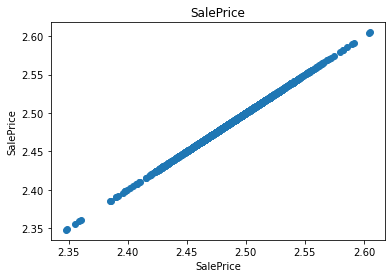

In [18]:
for feature in continuous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        #Also take sales Price log too as the sale price is not perfectly Guassian Distributed
        dataset["SalePrice"]=np.log(dataset["SalePrice"])
        plt.scatter(dataset[feature],dataset["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

# Outlier 

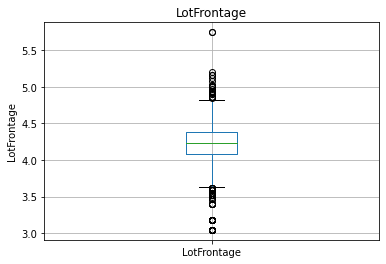

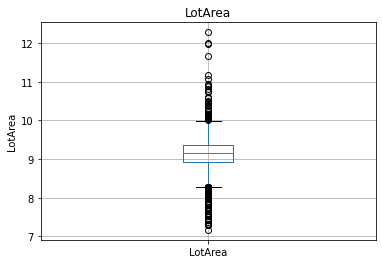

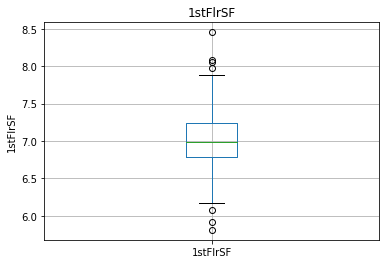

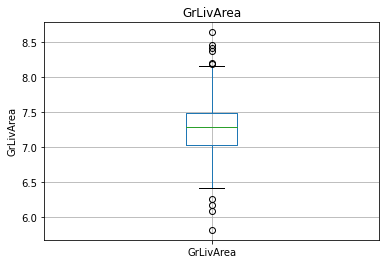

In [19]:
for feature in continuous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        #Also take sales Price log too as the sale price is not perfectly Guassian Distributed
        dataset["SalePrice"]=np.log(dataset["SalePrice"])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Features

In [20]:
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtype=="object"]
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [21]:
data[categorical_feature].head(5)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [22]:
for feature in categorical_feature:
    print("The Feature {}  have {}".format(feature, len(data[feature].unique())))

The Feature MSZoning  have 5
The Feature Street  have 2
The Feature Alley  have 3
The Feature LotShape  have 4
The Feature LandContour  have 4
The Feature Utilities  have 2
The Feature LotConfig  have 5
The Feature LandSlope  have 3
The Feature Neighborhood  have 25
The Feature Condition1  have 9
The Feature Condition2  have 8
The Feature BldgType  have 5
The Feature HouseStyle  have 8
The Feature RoofStyle  have 6
The Feature RoofMatl  have 8
The Feature Exterior1st  have 15
The Feature Exterior2nd  have 16
The Feature MasVnrType  have 5
The Feature ExterQual  have 4
The Feature ExterCond  have 5
The Feature Foundation  have 6
The Feature BsmtQual  have 5
The Feature BsmtCond  have 5
The Feature BsmtExposure  have 5
The Feature BsmtFinType1  have 7
The Feature BsmtFinType2  have 7
The Feature Heating  have 6
The Feature HeatingQC  have 5
The Feature CentralAir  have 2
The Feature Electrical  have 6
The Feature KitchenQual  have 4
The Feature Functional  have 7
The Feature FireplaceQu 

# Relationship Between Categorical and independent Feature 

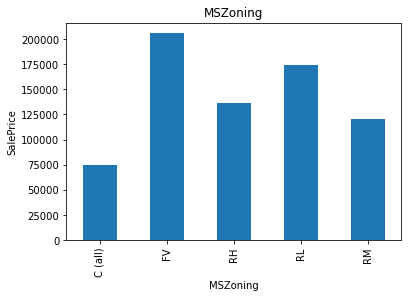

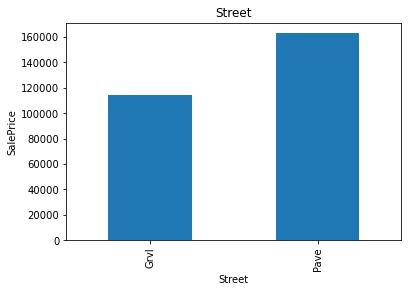

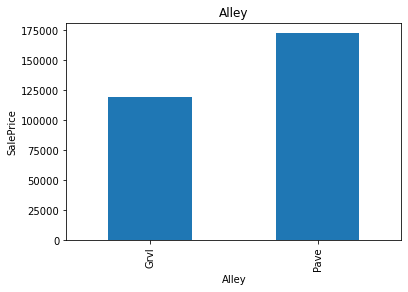

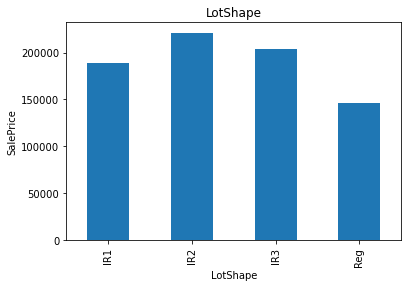

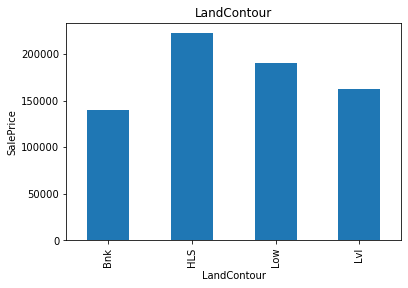

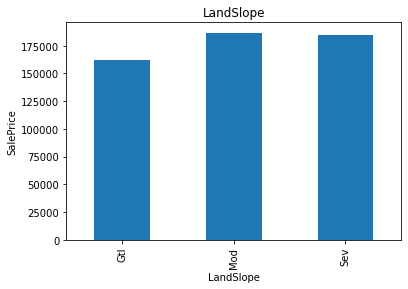

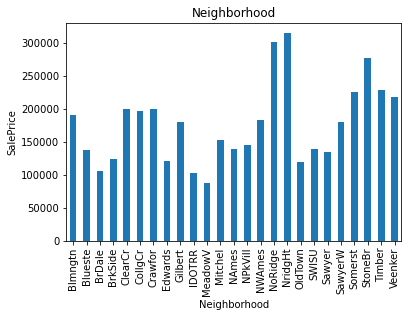

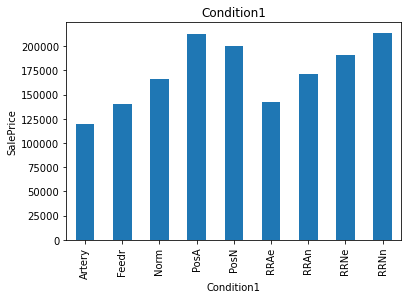

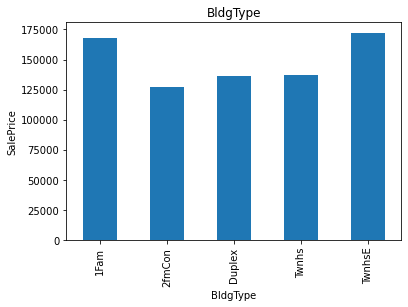

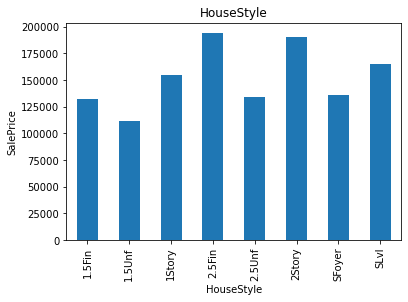

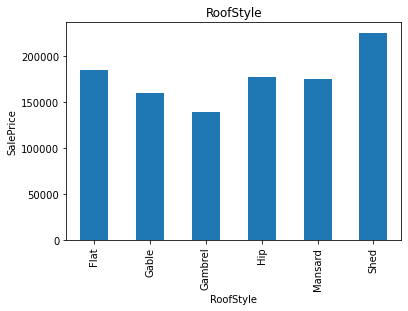

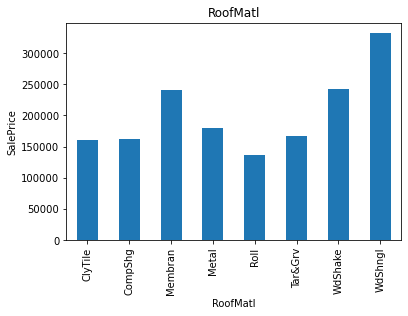

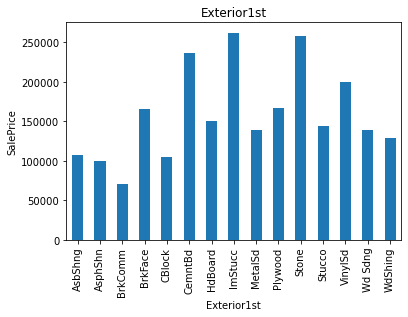

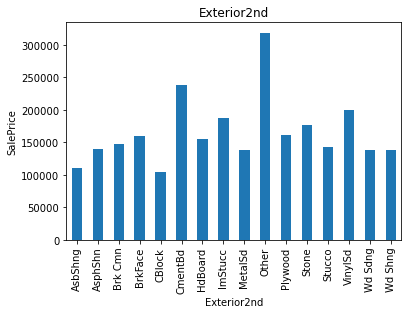

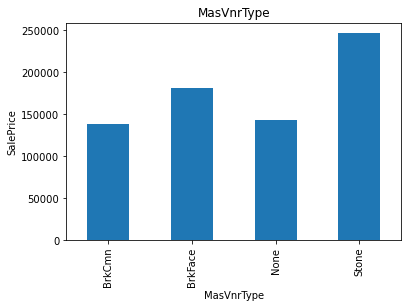

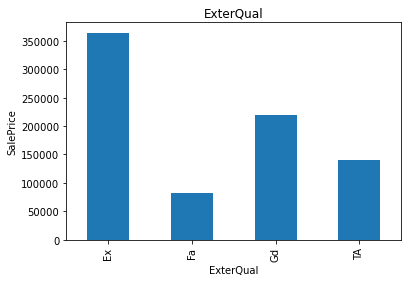

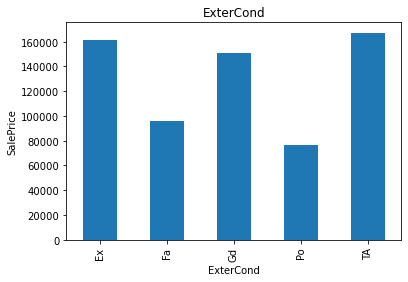

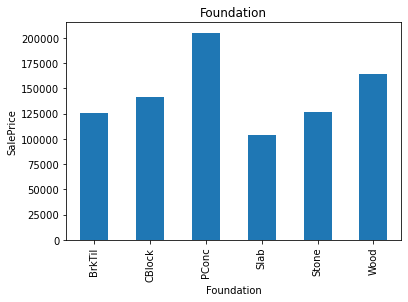

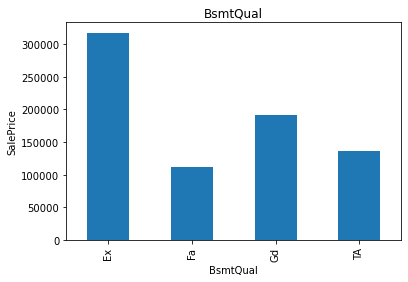

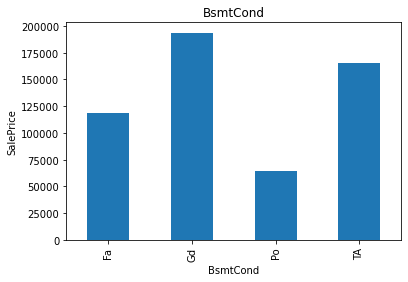

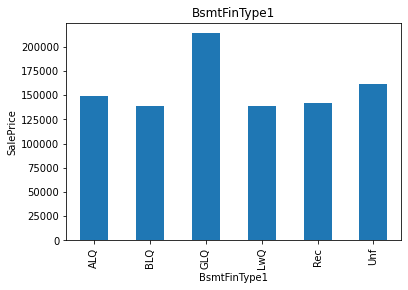

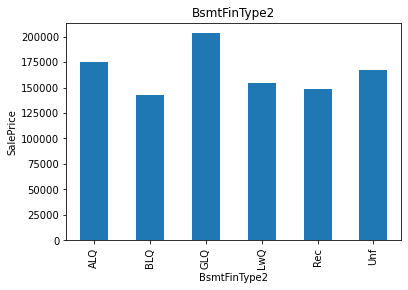

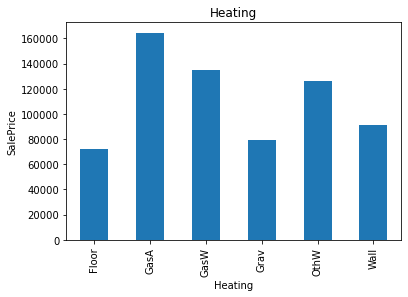

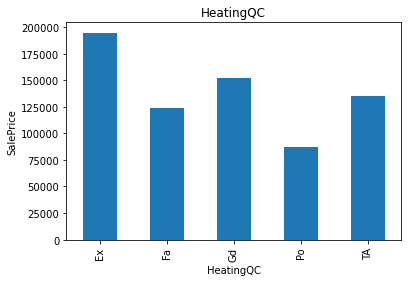

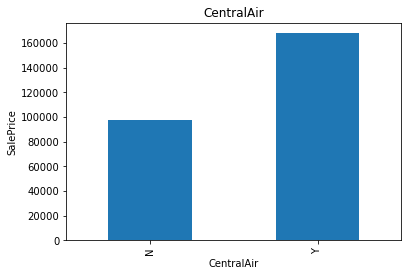

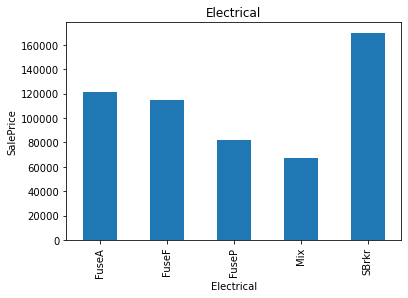

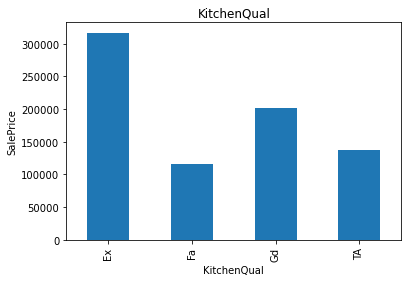

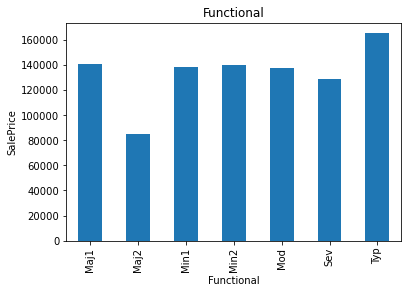

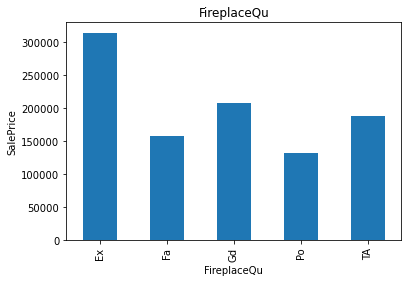

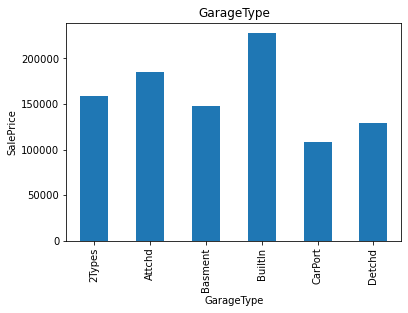

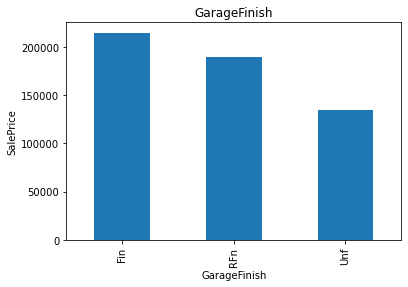

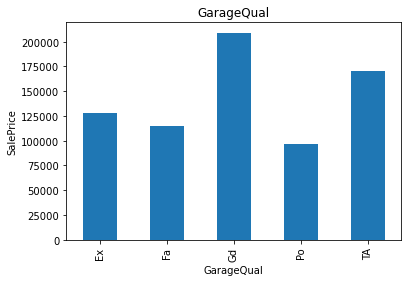

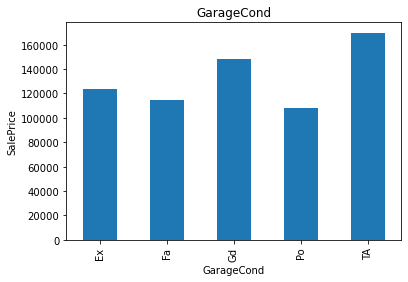

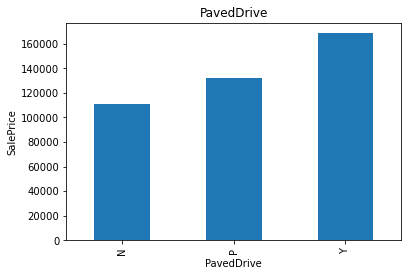

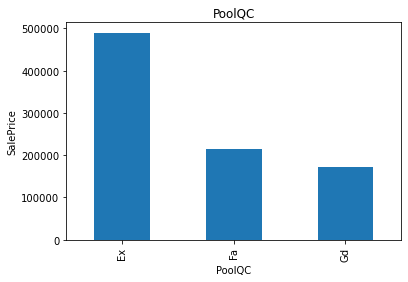

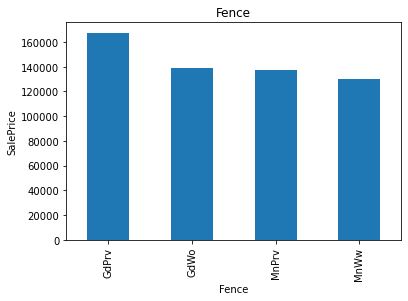

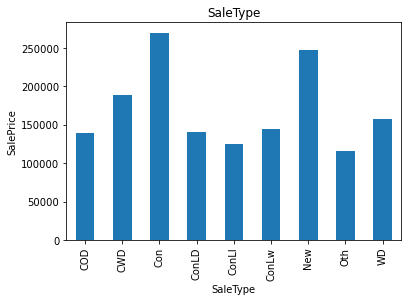

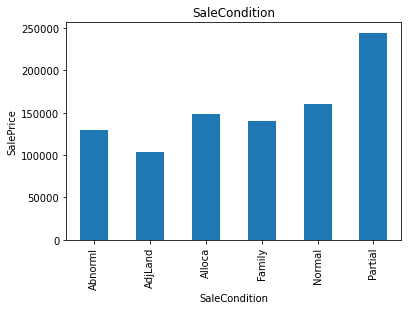

In [23]:
for feature in categorical_feature:
    dataset=data.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()


# Feature Engineering

1.Missing Values (categorical and Numerical)
2-Normalizing Continuous Features
3-Removing Outliers
4-Converting Categorical to Labeled Data
5-Feature Scaling
6-Feature Selection (Dimensionality Reduction)
7-Model Deployment


# Handling Missing Values in Categorical features

In [24]:
dataset=data.copy()
features_nan_categorical=[features for features in dataset.columns if dataset[features].isnull().sum() and dataset[features].dtype=="object"]

for features in features_nan_categorical:
    print(features,(data[features].isnull().sum()))

Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [25]:

dataset[features_nan_categorical]=dataset[features_nan_categorical].fillna("Missing")

dataset[features_nan_categorical].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [26]:
dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0        1          60       RL         65.0     8450   Pave  Missing   
1        2          20       RL         80.0     9600   Pave  Missing   
2        3          60       RL         68.0    11250   Pave  Missing   
3        4          70       RL         60.0     9550   Pave  Missing   
4        5          60       RL         84.0    14260   Pave  Missing   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Missing   
1456  1457          20       RL         85.0    13175   Pave  Missing   
1457  1458          70       RL         66.0     9042   Pave  Missing   
1458  1459          20       RL         68.0     9717   Pave  Missing   
1459  1460          20       RL         75.0     9937   Pave  Missing   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1455       Norm       Norm     1Fam     2Story            6            5   
1456       Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     2Story            7            9   
1458       Norm       Norm     1Fam     1Story            5            6   
1459       Norm       Norm     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   
1456       1978          1988     Gable  CompShg     Plywood     Plywood   
1457       1941          2006     Gable  CompShg     CemntBd     CmentBd   
1458       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1459       1965          1965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0        Gd   

# Handling missing values in in Numerical Features

In [27]:
features_nan_numerical=[features for features in dataset.columns if dataset[features].isnull().sum() and dataset[features].dtype!="object"]

for features in features_nan_numerical:
    print(features,(dataset[features].isnull().sum()))

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [28]:
#Replacing Null with Median in all Numerical features(columns)

for features in features_nan_numerical:
    median_value=dataset[features].median()
    dataset[features].fillna(median_value,inplace=True)

In [29]:
dataset[features_nan_numerical].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

# Normalizing Continuous Features

In [30]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [31]:
dataset

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley  \
0        1          60       RL     4.174387  9.041922   Pave  Missing   
1        2          20       RL     4.382027  9.169518   Pave  Missing   
2        3          60       RL     4.219508  9.328123   Pave  Missing   
3        4          70       RL     4.094345  9.164296   Pave  Missing   
4        5          60       RL     4.430817  9.565214   Pave  Missing   
...    ...         ...      ...          ...       ...    ...      ...   
1455  1456          60       RL     4.127134  8.976768   Pave  Missing   
1456  1457          20       RL     4.442651  9.486076   Pave  Missing   
1457  1458          70       RL     4.189655  9.109636   Pave  Missing   
1458  1459          20       RL     4.219508  9.181632   Pave  Missing   
1459  1460          20       RL     4.317488  9.204020   Pave  Missing   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1455       Norm       Norm     1Fam     2Story            6            5   
1456       Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     2Story            7            9   
1458       Norm       Norm     1Fam     1Story            5            6   
1459       Norm       Norm     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   
1456       1978          1988     Gable  CompShg     Plywood     Plywood   
1457       1941          2006     Gable  CompShg     CemntBd     CmentBd   
1458       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1459       1965          1965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0 

# Removing Outliers

In [32]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']

for feature in numerical_features:
        q1=dataset[feature].quantile(0.25)
        q3=dataset[feature].quantile(0.75)
        iqr=q3-q1
        lower_lim=q1-1.5*iqr
        upper_lim=q3+1.5*iqr
        
        dataset=dataset[(dataset[feature]<=upper_lim) & (dataset[feature]>=lower_lim)]
    

    
    
    
  
        

        
       
#dataset[(dataset.LotFrontage>upper_lim)|(dataset.LotFrontage<lower_lim)]

In [33]:
dataset

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley  \
0        1          60       RL     4.174387  9.041922   Pave  Missing   
2        3          60       RL     4.219508  9.328123   Pave  Missing   
6        7          20       RL     4.317488  9.218705   Pave  Missing   
10      11          20       RL     4.248495  9.323669   Pave  Missing   
13      14          20       RL     4.510860  9.273503   Pave  Missing   
...    ...         ...      ...          ...       ...    ...      ...   
1436  1437          20       RL     4.094345  9.104980   Pave  Missing   
1444  1445          20       RL     4.143135  9.047821   Pave  Missing   
1447  1448          60       RL     4.382027  9.210340   Pave  Missing   
1451  1452          20       RL     4.356709  9.133675   Pave  Missing   
1455  1456          60       RL     4.127134  8.976768   Pave  Missing   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
6         Reg         Lvl    AllPub    Inside       Gtl      Somerst   
10        Reg         Lvl    AllPub    Inside       Gtl       Sawyer   
13        IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
...       ...         ...       ...       ...       ...          ...   
1436      Reg         Lvl    AllPub       FR2       Gtl        NAmes   
1444      Reg         Lvl    AllPub       FR2       Gtl      CollgCr   
1447      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1451      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
2          Norm       Norm     1Fam     2Story            7            5   
6          Norm       Norm     1Fam     1Story            8            5   
10         Norm       Norm     1Fam     1Story            5            5   
13         Norm       Norm     1Fam     1Story            7            5   
...         ...        ...      ...        ...          ...          ...   
1436       Norm       Norm     1Fam     1Story            4            6   
1444       Norm       Norm     1Fam     1Story            7            5   
1447       Norm       Norm     1Fam     2Story            8            5   
1451       Norm       Norm     1Fam     1Story            8            5   
1455       Norm       Norm     1Fam     2Story            6            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
6          2004          2005     Gable  CompShg     VinylSd     VinylSd   
10         1965          1965       Hip  CompShg     HdBoard     HdBoard   
13         2006          2007     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1436       1971          1971     Gable  CompShg     HdBoard     HdBoard   
1444       2004          2004     Gable  CompShg     VinylSd     VinylSd   
1447       1995          1996     Gable  CompShg     VinylSd     VinylSd   
1451       2008          2009     Gable  CompShg     CemntBd     CmentBd   
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
6         Stone       186.0        Gd        TA      PConc       Ex       TA   
10         None         0.0        TA        TA     CBlock       TA       TA   
13        Stone       306.0 

# Categorical to Integer Labeled Conversion

In [34]:


for feature in categorical_feature:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [35]:
dataset.LotShape.value_counts()

0    180
2    150
1      5
3      1
Name: LotShape, dtype: int64

# Scaling Data

In [36]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

# Feature Selection (Dimensionality Reduction)

In [37]:
len(dataset.columns)

81

In [38]:
y=dataset[['SalePrice']]

In [39]:
x=dataset.drop(['Id','SalePrice'],axis=1)

In [40]:
len(x.columns) #are Selected

79

In [41]:
x

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0             60         2     4.174387  9.041922       0      2         0   
2             60         2     4.219508  9.328123       0      2         2   
6             20         2     4.317488  9.218705       0      2         0   
10            20         2     4.248495  9.323669       0      2         0   
13            20         2     4.510860  9.273503       0      2         2   
...          ...       ...          ...       ...     ...    ...       ...   
1436          20         2     4.094345  9.104980       0      2         0   
1444          20         2     4.143135  9.047821       0      2         0   
1447          60         2     4.382027  9.210340       0      2         0   
1451          20         2     4.356709  9.133675       0      2         0   
1455          60         2     4.127134  8.976768       0      2         0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               2          0          1          1            12           3   
2               2          0          1          1            12           3   
6               2          0          1          1            17           3   
10              2          0          1          1             2           3   
13              2          0          1          1            12           3   
...           ...        ...        ...        ...           ...         ...   
1436            2          0          0          1             4           3   
1444            2          0          0          1            12           3   
1447            2          0          1          1            12           3   
1451            2          0          1          1            17           3   
1455            2          0          1          1            11           3   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              0         1           4            7            5       2003   
2              0         1           4            7            5       2001   
6              0         1           3            8            5       2004   
10             0         1           3            5            5       1965   
13             0         1           3            7            5       2006   
...          ...       ...         ...          ...          ...        ...   
1436           0         1           3            4            6       1971   
1444           0         1           3            7            5       2004   
1447           0         1           4            8            5       1995   
1451           0         1           3            8            5       2008   
1455           0         1           4            6            5       1999   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             2003          2         0            7            6           2   
2             2002          2         0            7            6           2   
6             2005          2         0            7            6           4   
10            1965          1         0            2            4           1   
13            2007          2         0            7            6           4   
...            ...        ...       ...          ...          ...         ...   
1436          1971          2         0            2            4           1   
1444          2004          2         0            7            6           2   
1447          1996          2         0            7            6           2   
1451          2009          2         0            8            8           4   
1455          2000          2         0            7            6           1   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          196.0          1          2           2         1         2   
2          162.0          1          2

# Splitting data

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,train_size=0.95)

# Feature Selection Using Mutual Information Gain Method

In [64]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train, y_train)


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

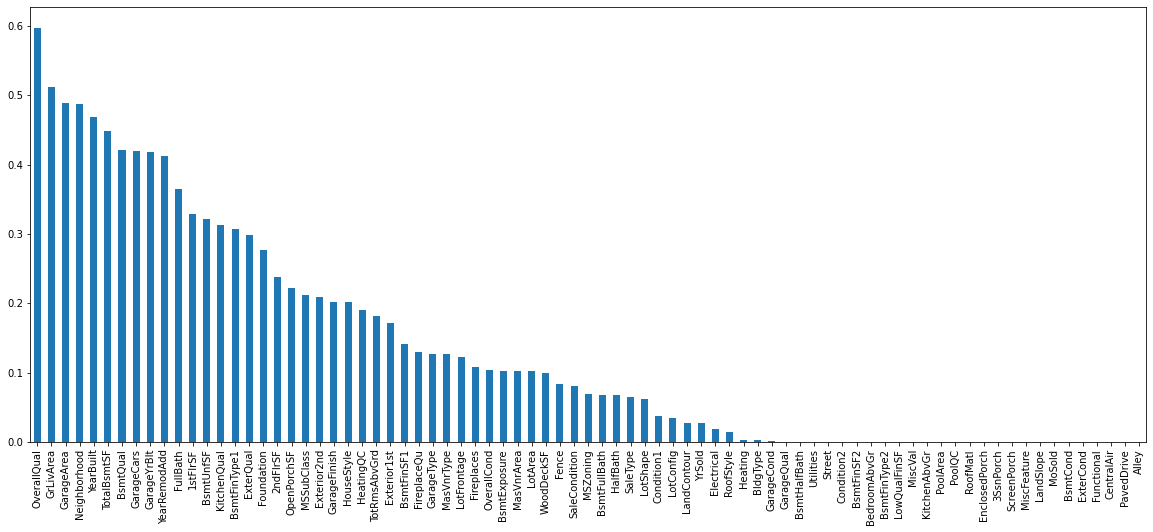

In [66]:

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

# Using Percentile Method

In [67]:
from sklearn.feature_selection import SelectPercentile

In [68]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(x_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000028CCCE9DE50>)

In [69]:
selected_top_columns.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [70]:
x_train.columns[selected_top_columns.get_support()]

Index(['Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

# USing KBEST TO SELECT THOSE SPECIFIC FEATURES


In [71]:
from sklearn.feature_selection import SelectKBest

In [72]:
sel=SelectKBest(mutual_info_regression,k=10,).fit(x_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
x_train.columns[sel.get_support()]

Index(['Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtQual',
       'TotalBsmtSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [74]:
x_train=selected_top_columns.transform(x_train)
x_test=selected_top_columns.transform(x_test)

# Linear Regression

In [76]:
from sklearn import linear_model

In [77]:
model=linear_model.LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9552841863233397

In [78]:
predict=model.predict(x_test)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predict))

0.05735890688505105

# Random forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators=200, random_state=0) 
classifier.fit(x_train, y_train) 
predictions = classifier.predict(x_test)

<ipython-input-79-59073a07c1a2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


# GradientBoostingRegressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
G_model= GradientBoostingRegressor(random_state=0,n_estimators=1000,max_depth=2,learning_rate=0.04,min_samples_split=3)
G_model.fit(x_train, y_train)
G_model.score(x_test,y_test)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9639752026057397

In [81]:
G_model.predict(x_test)


array([12.06394131, 11.69738368, 11.83528237, 12.50913232, 11.97029373,
       12.34080513, 12.13758937, 11.83967671, 12.20577331, 12.14325231,
       11.72415511, 12.2106965 , 12.60069181, 11.65577292, 12.08993477,
       12.17460469, 12.06628269])

In [82]:
new=pd.DataFrame(np.exp(x_test))

new["Actual Values"]=np.exp(y_test)

new["Predicted_Values"]=np.exp(G_model.predict(x_test))
new.head(20)

<ipython-input-82-69b62b02db14>:1: RuntimeWarning: overflow encountered in exp
  new=pd.DataFrame(np.exp(x_test))


0            1    2    3         4         5           6  \
0   5.987414e+04   403.428793  inf  inf  2.718282  2.718282   54.598150   
1   5.459815e+01    54.598150  inf  inf  1.000000  1.000000    1.000000   
2   7.389056e+00   148.413159  inf  inf  1.000000  1.000000   20.085537   
3   2.415495e+07  2980.957987  inf  inf  2.718282  2.718282  148.413159   
4   5.987414e+04   403.428793  inf  inf  1.000000  2.718282   54.598150   
5   1.627548e+05  2980.957987  inf  inf  2.718282  2.718282  148.413159   
6   1.627548e+05  1096.633158  inf  inf  2.718282  2.718282   54.598150   
7   1.484132e+02   403.428793  inf  inf  1.000000  1.000000   54.598150   
8   1.627548e+05   403.428793  inf  inf  1.000000  2.718282  148.413159   
9   5.987414e+04   403.428793  inf  inf  2.718282  2.718282  148.413159   
10  4.034288e+02    54.598150  inf  inf  1.000000  1.000000    1.000000   
11  1.627548e+05  1096.633158  inf  inf  2.718282  2.718282  148.413159   
12  2.415495e+07  2980.957987  inf  inf  2.718282  7.389056  148.413159   
13  2.008554e+01    54.598150  inf  inf  1.000000  1.000000    7.389056   
14  1.627548e+05   403.428793  inf  inf  2.718282  2.718282  148.413159   
15  2.202647e+04   403.428793  inf  inf  2.718282  2.718282  148.413159   
16  5.987414e+04  1096.633158  inf  inf  2.718282  2.718282  148.413159   

                7              8       9      10        11        12   13  \
0             inf            inf   799.0  1571.0  7.389056  1.000000  inf   
1   4.505502e+114            inf   864.0   864.0  2.718282  1.000000  inf   
2    1.986265e+44            inf   894.0   894.0  2.718282  1.000000  inf   
3   8.623969e+211            inf  1566.0  1566.0  7.389056  7.389056  inf   
4   3.352748e+267  3.352748e+267   616.0  1412.0  7.389056  7.389056  inf   
5             inf            inf   866.0  1768.0  7.389056  7.389056  inf   
6             inf            inf  1422.0  1422.0  7.389056  7.389056  inf   
7             inf            inf   944.0  1489.0  7.389056  1.000000  inf   
8   1.579535e+210            inf  1493.0  1493.0  7.389056  7.389056  inf   
9   3.801904e+141            inf   807.0  1509.0  7.389056  7.389056  inf   
10   1.000000e+00  7.012806e+291   757.0  1324.0  2.718282  1.000000  inf   
11  1.229057e+191            inf  1479.0  1479.0  7.389056  7.389056  inf   
12  4.691922e+137            inf  1694.0  1694.0  7.389056  7.389056  inf   
13  3.378414e+148            inf   894.0   894.0  2.718282  1.000000  inf   
14            inf            inf  1314.0  1314.0  7.389056  7.389056  inf   
15  2.106491e+176            inf   832.0  1710.0  7.389056  7.389056  inf   
16  2.397145e+126            inf   716.0  1432.0  7.389056  7.389056  inf   

          14             15  Actual Values  Predicted_Values  
0   7.389056  1.076225e+165            NaN     173501.462454  
1   7.389056  1.424366e+250            NaN     120256.673515  
2   7.389056  1.229057e+191            NaN     138037.735100  
3   7.389056            inf            NaN     270799.051619  
4   7.389056  4.123027e+187            NaN     157991.059551  
5   7.389056  1.052472e+251            NaN     228846.128843  
6   7.389056  7.384918e+271       307000.0     186761.815934  
7   2.718282  1.700888e+104            NaN     138645.654213  
8   7.389056  4.184049e+220            NaN     199940.141615  
9   7.389056  4.761364e+170            NaN     187822.436659  
10  2.718282  1.700888e+104            NaN     123519.597533  
11  7.389056  2.169306e+242            NaN     200926.911810  
12  7.389056  1.626636e+276            NaN     296763.797064  
13  7.389056  5.221470e+173            NaN     115355.382124  
14  7.389056  1.229057e+191            NaN     178070.491011  
15  7.389056  5.662495e+219            NaN     193804.401338  
16  7.389056  4.123027e+187            NaN     173908.172327

# Saving Model

In [62]:
import joblib

In [ ]:
joblib.dump(G_model,"Gradient_Trained_Model")

# Importing Trained Model

In [ ]:
#Loading Trained model for use
test_model=joblib.load("Gradient_Trained_Model")


# Importing TESTING FILE

In [ ]:
dataset=pd.read_csv("test.csv")
dataset

In [ ]:
features_nan_categorical=[features for features in dataset.columns if dataset[features].isnull().sum() and dataset[features].dtype=="object"]

for features in features_nan_categorical:
    print(features,(data[features].isnull().sum()))

In [ ]:

dataset[features_nan_categorical]=dataset[features_nan_categorical].fillna("Missing")

dataset[features_nan_categorical].isnull().sum()

In [ ]:
features_nan_numerical=[features for features in dataset.columns if dataset[features].isnull().sum() and dataset[features].dtype!="object"]

for features in features_nan_numerical:
    print(features,(dataset[features].isnull().sum()))

In [ ]:

for features in features_nan_numerical:
    median_value=dataset[features].median()
    dataset[features].fillna(median_value,inplace=True)

In [ ]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [ ]:
dataset

In [ ]:
categorical=[features for features in dataset.columns if dataset[features].dtype=="object"]
categorical

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


for features in categorical:
    #label_encoder=LabelEncoder()
    dataset[features]=label_encoder.fit_transform(dataset[features])

In [ ]:
x=dataset.drop(['Id','KitchenAbvGr', 'EnclosedPorch','MSSubClass','OverallCond','YrSold','LowQualFinSF','MiscVal','BsmtHalfBath','BsmtFinSF2','Utilities','Condition2','Street','3SsnPorch','MoSold','LandSlope','MiscFeature','PoolArea','PoolQC','ScreenPorch','Heating','Functional','ExterCond','LotConfig','Alley','LandContour','Condition1','BsmtFinType2','BedroomAbvGr','BldgType','Fence','BsmtUnfSF','BsmtCond','BsmtFullBath','Electrical','PavedDrive','RoofStyle','SaleCondition','CentralAir','HouseStyle','LotArea','LotShape','GarageQual','SaleType','GarageCond','HalfBath','OpenPorchSF','2ndFlrSF','WoodDeckSF','MSZoning','LotFrontage','Exterior2nd','BsmtExposure','BsmtFinType1','BsmtFinSF1','HeatingQC','MasVnrType','Fireplaces','MasVnrArea'],axis=1)

In [ ]:
x

In [ ]:
pred=pd.DataFrame()

In [ ]:

predictions=np.exp(test_model.predict(x))
predictions

In [ ]:
results=pd.DataFrame(data=predictions, columns=["Sale Price"])
results

In [ ]:
results["ID"]=dataset["Id"]
results

In [ ]:
results.to_csv("sample_submissions.csv")